<a href="https://colab.research.google.com/github/dipankarsahu1000/Netflix-Movie-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **By** - Dipankar Sahu
##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This dataset consists of TV shows and movies available on Netflix as of 2021. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. We will be exploring other such insights obtained from the same dataset along with some clustering model implementation.

# **GitHub Link -**

https://github.com/dipankarsahu1000/Netflix-Movie-and-TV-Shows-Clustering

# **Problem Statement**


In this project, we are required to do the following:
* Exploratory Data Analysis.
* Finally and most importantly, clustering similar content by matching text-based features.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing some important libraries for initiation. More libraries will be added later as required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter: Full Stack Data Science/Projects/Unsupervised ML/Netflix Movie and TV Shows Clustering/Datasets/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 7787 rows and 12 columns.


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dup_count = len(df[df.duplicated()])
print(f"There {dup_count} duplicate values in the dataset.")

There 0 duplicate values in the dataset.


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
null_count = df.isna().sum().sum()
print(f"There {null_count} missing/null values in the dataset.")

There 3631 missing/null values in the dataset.


In [10]:
# Checking the Missing Values/Null Values in each of the column
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

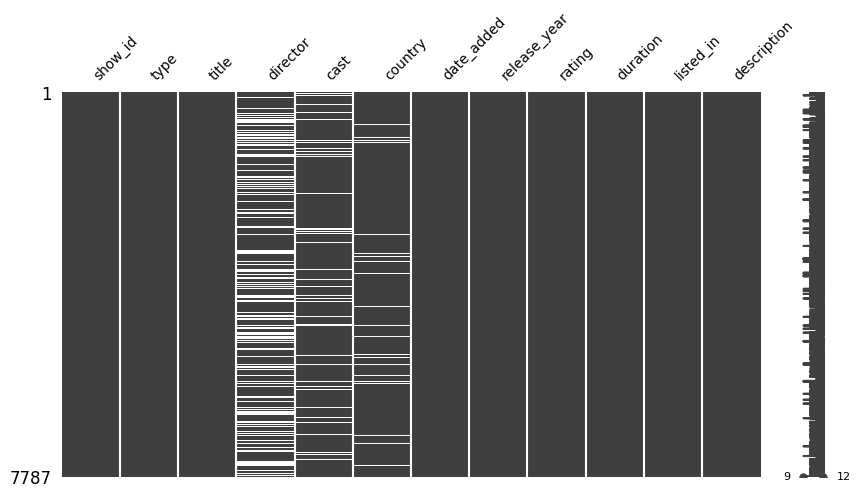

In [11]:
# Visualizing the missing values
msno.matrix(df, figsize = (10, 5), fontsize = 10)

### What did you know about your dataset?

* There are 7787 rows and 12 columns in the dataset.
* The issue of duplicate values is not there in the dataset.
* The are is a total of 3631 missing/null values in the dataset. The missing values are there in the 'director', 'cast', 'country', 'date_added' and 'rating' columns only.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


* Note: There is only one numerical column in the dataset: 'release_year'.

### Variables Description

1. **show_id**: The unique ID for every Movie/TV show.
2. **type**: An identifier depicting whether the record is a movie or a TV show.
3. **title**: The title of the movie/show.
4. **director**: The director of the show.
5. **cast**: The actors involved.
6. **country**: The country of production.
7. **date_added**: The date it was added on Netflix.
8. **release_year**: The actual release year of the show.
9. **rating**: The rating of the show.
10. **duration**: The total duration in minutes or number of seasons.
11. **listed_in**: The genre of the show.
12. **description**: The description or the summary of the show.

### Check Unique Values for each variable.

In [14]:
# Check the number of unique values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

In [15]:
# Creating a copy of the original dataset before proceeding further
og_df = df.copy()

###**i. Taking care of the null values**

In [16]:
# Checking the number of null values only in those columns which contains null values
df.isna().sum()[df.isna().sum() > 0]

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

* There are few null values in the 'rating' column. Perhaps the null values can be imputed with the most frequent rating, i.e. the mode.

In [17]:
# Checking the most frequent rating for the Movies only
df[df['type'] == 'Movie']['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [18]:
# Checking the most frequent rating for the TV Shows only
df[df['type'] == 'TV Show']['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [19]:
# Imputing the null values in the 'rating' column with the mode value
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

* Now, examining possible ways to impute the null values for the 'date_added' column.

In [20]:
# Checking how the values under the 'date_added' column is distributed
df.groupby('date_added')['show_id'].count().sort_values(ascending = False)

date_added
January 1, 2020      118
November 1, 2019      94
March 1, 2018         76
December 31, 2019     76
October 1, 2018       72
                    ... 
April 27, 2019         1
April 27, 2017         1
April 26, 2017         1
May 17, 2011           1
 April 15, 2018        1
Name: show_id, Length: 1565, dtype: int64

* The most frequent value under the 'date_added' column is 'January 1, 2020'. So, we can try and impute this value into the null values.

In [21]:
# # Imputing the null values in the 'rating' column with the mode value
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

* Due to the nature of the values in the 'director', 'cast' and 'country' columns, their null values cannot be imputed with any aggregate value. So, we will just impute a string "Unknown" for the null/missing values.

In [22]:
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna("Unknown")

In [23]:
# Checking for null values once again
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* So, the issue of null/missing values have been taken care of.

###**ii. Parsing 'date_added' values into datetime objects**

In [24]:
# Checking the exact datatype of the values under the 'date_added' column by selecting one value
type(df['date_added'][0])

str

In [25]:
# Converting the string objects under the 'date_added' column into the datetime objects
df['date_added'] = pd.to_datetime(df['date_added'])

###**iii. Creating new columns 'month_added' and 'year_added'**

In [26]:
# Creating a new column 'month_added'
df['month_added'] = df['date_added'].dt.month
df['month_added'] = df['date_added'].apply(lambda x: datetime.strftime(x, '%b'))

# Creating a new column 'year_added'
df['year_added'] = df['date_added'].dt.year

###**iv. Converting 'cast' and 'listed_in' into lists**

In [27]:
# Converting the string values under the 'cast' column into list
df['cast'] = df['cast'].apply(lambda x: x.split(","))

# Converting the values under the 'cast' column into list
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(","))

###**v. Creating new columns 'lead_actor', 'main_genre' and 'main_country'**

In [28]:
# Creating a new column 'lead_actor'
df['lead_actor'] = df['cast'].apply(lambda x: x[0])

In [29]:
# Creating a new column 'main_genre'
df['main_genre'] = df['listed_in'].apply(lambda x: x[0])

In [30]:
# Creating a new column 'prim_country', i.e. in case of multiple countries of production, the country which was mainly involved
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

In [31]:
# Checking
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,lead_actor,main_genre,main_country
0,s1,TV Show,3%,Unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,Aug,2020,João Miguel,International TV Shows,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,2016-12-23,2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Dec,2016,Demián Bichir,Dramas,Mexico
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,2018-12-20,2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",Dec,2018,Tedd Chan,Horror Movies,Singapore
3,s4,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,2017-11-16,2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi...",Nov,2017,Elijah Wood,Action & Adventure,United States
4,s5,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,2020-01-01,2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,Jan,2020,Jim Sturgess,Dramas,United States


### What all manipulations have you done and insights you found?

* The null/missing values were taken care of by imputing with suitable values.
* The values under 'date_added' were parsed into datetime objects.
* The values under 'cast' and 'listed_in' were converted from string to list.
* Four new columns called 'month_added', 'year_added', 'lead_actor', 'main_genre' and 'main_country' were created.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [32]:
warnings.filterwarnings('ignore')

#### Chart - 1: Pie Plot - Percentage of Movies and TV Shows

Text(0.5, 1.0, 'Percentage of Movies and TV Shows')

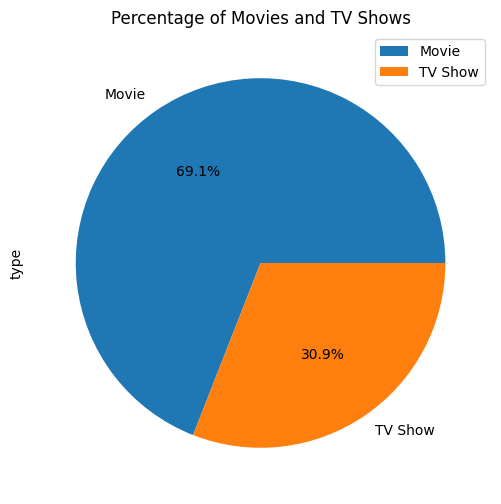

In [33]:
plt.figure(figsize = (6, 6))
df['type'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

plt.legend()
plt.title('Percentage of Movies and TV Shows')

##### 1. Why did you pick the specific chart?

* To find out what percentage of Movies and TV Shows are there.

##### 2. What is/are the insight(s) found from the chart?

* There are more Movies than TV Shows. Of all the contents, 69.1% are Movies and 30.9% are TV Show.

#### Chart - 2: Count Plot - Number of Movies and TV Shows Added on Netflix over the Years

Text(0.5, 1.0, 'Number of Movies and TV Shows Added on Netflix over the Years')

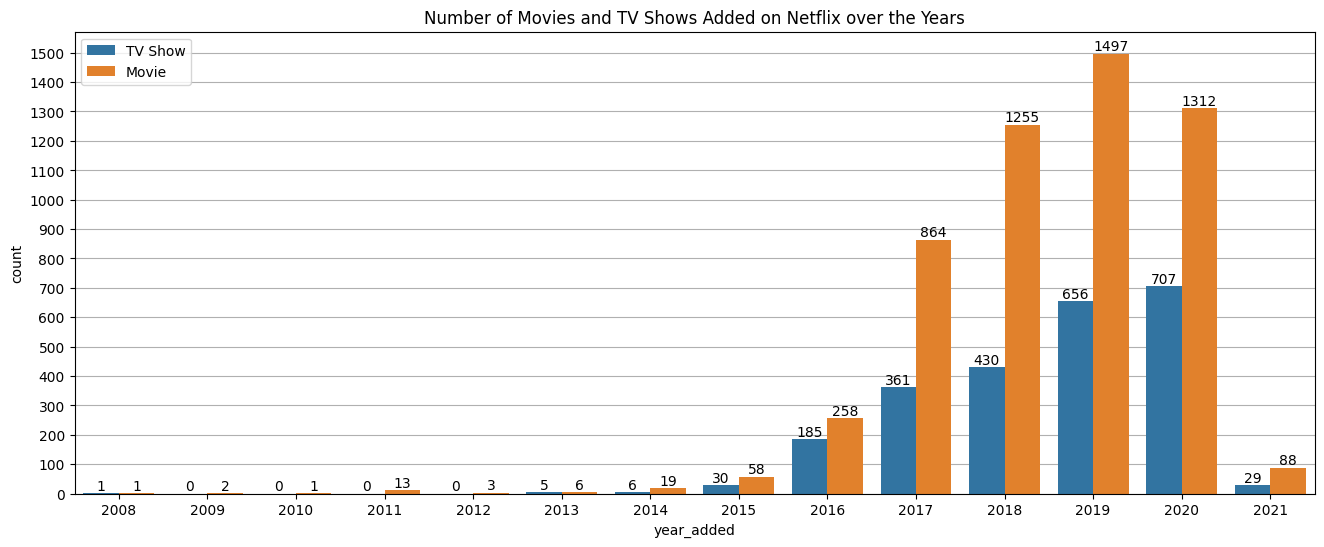

In [34]:
plt.figure(figsize = (16, 6))
plt.yticks(range(0, 2000, 100))

sns.countplot(data = df, x = 'year_added', hue = 'type')

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)
ax.legend(loc = 'upper left')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Number of Movies and TV Shows Added on Netflix over the Years')

* Note: Here, the number of new Movies and TV Shows being added to the Netflix database in a specific year is being discussed here, not the total number of Movies and TV Shows available on Netflix for streaming.

##### 1. Why did you pick the specific chart?

* To check the number of new Movies and TV Shows added on Netflix over the years.

##### 2. What is/are the insight(s) found from the chart?

* After the year of 2015, there has been rapid increase in the influx of both: Movies and TV Shows.
* There is a sharp rise in the number of new Movies being added, from 2015 to 2019. For the number of new TV Shows being added each year, there is a steady increase.
* In the year of 2020, the number of new Movies added was less than the previous year.

(The 2021 is ignored here, as this dataset is assumed to be compiled before 2021 was over).

#### Chart - 3: Count Plot - Number of Movies and TV Shows Added on Netflix over the Months

Text(0.5, 1.0, 'Number of Movies and TV Shows Added on Netflix over the Months')

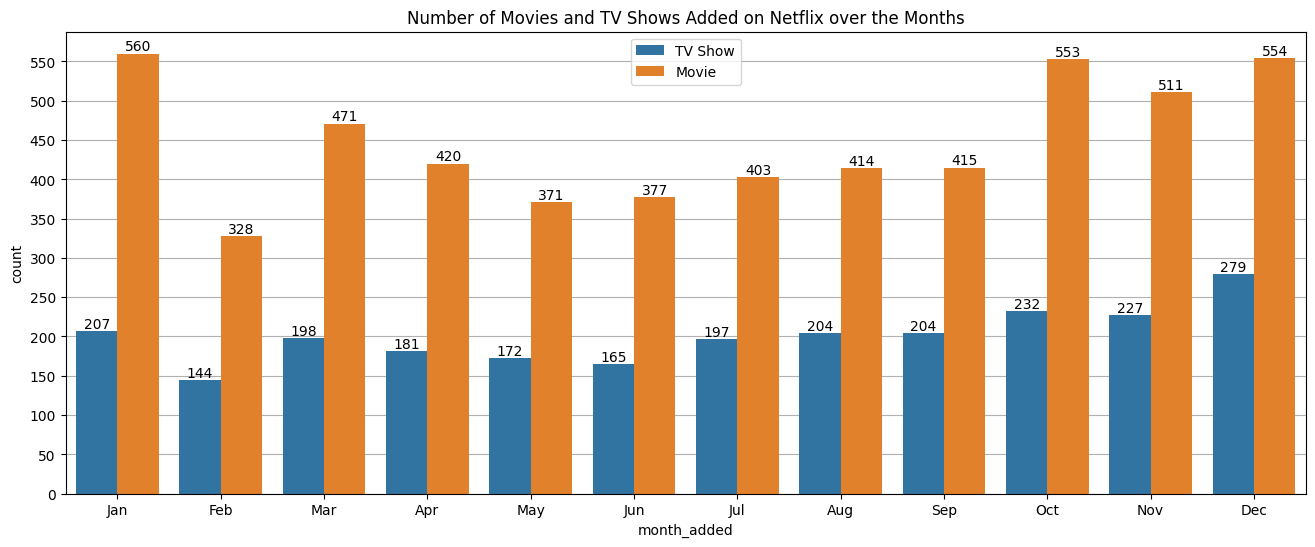

In [35]:
plt.figure(figsize = (16, 6))
plt.yticks(range(0, 600, 50))

sns.countplot(data = df, x = 'month_added', hue = 'type', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)
ax.legend(loc = 'upper center')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Number of Movies and TV Shows Added on Netflix over the Months')

* Note: Here, the number of new Movies and TV Shows being added to the Netflix database in a specific month is being discussed here, not the total number of Movies and TV Shows available on Netflix for streaming.

##### 1. Why did you pick the specific chart?

* To check in which month more number of contents are being added to Netflix.

##### 2. What is/are the insight(s) found from the chart?

* Most number of Movies were added to Netflix in the month of January, followed by December and October

* Most number of TV Shows were added to Netflix in the month of December.

#### Chart - 4: Count Plot - Popular Genres for the Movies

Text(0.5, 1.0, 'Popular Genres for the Movies')

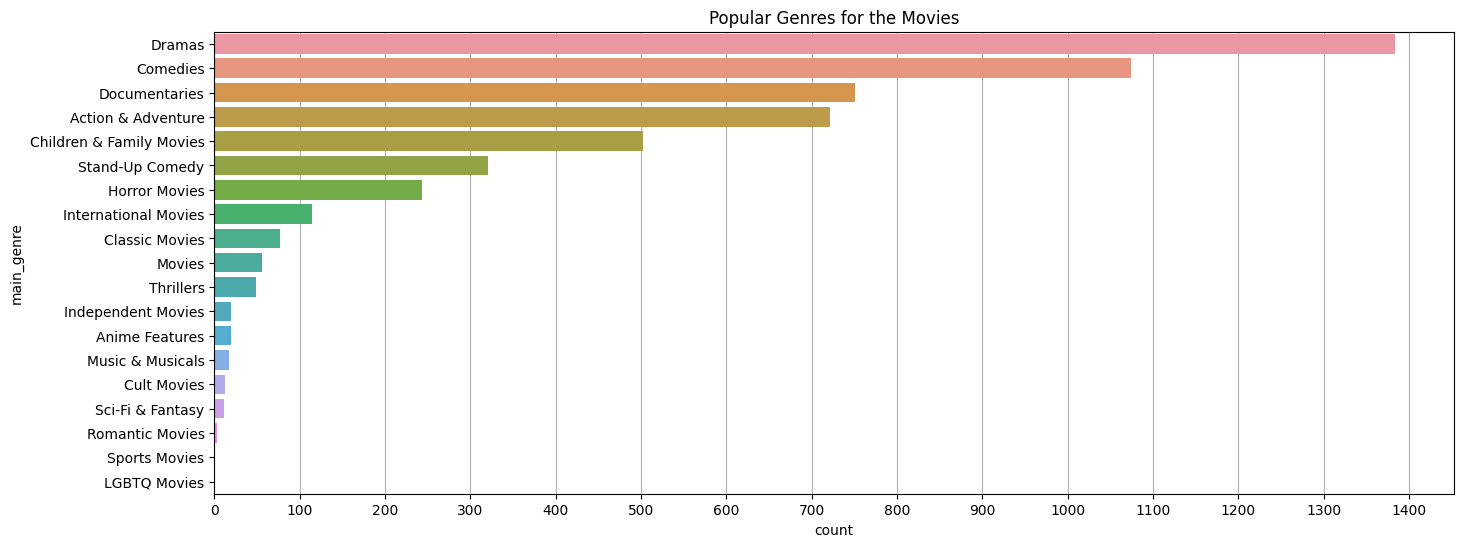

In [36]:
plt.figure(figsize = (16, 6))
plt.xticks(range(0, 1500, 100))

sns.countplot(data = df[df['type'] == 'Movie'], y = 'main_genre', order = df[df['type'] == 'Movie']['main_genre'].value_counts().index)

ax = plt.gca()
ax.xaxis.grid()
ax.set_axisbelow(True)

plt.title('Popular Genres for the Movies')

##### 1. Why did you pick the specific chart?

* To check the which genres are popular for the movies.

##### 2. What is/are the insight(s) found from the chart?

* Some of the most popular genres for the movies are: Dramas, Comedies, Documentaries and Action & Adventure.

#### Chart - 5: Count Plot - Popular Genres for the TV Shows

Text(0.5, 1.0, 'Popular Genres for the TV Shows')

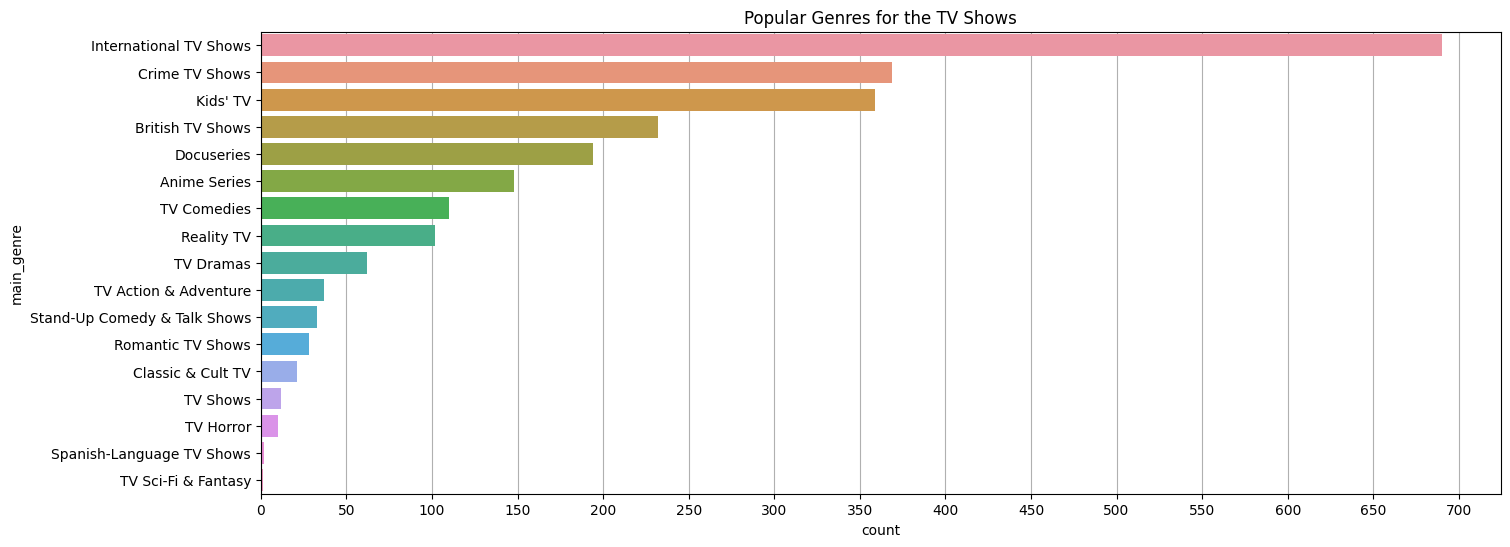

In [37]:
plt.figure(figsize = (16, 6))
plt.xticks(range(0, 800, 50))

sns.countplot(data = df[df['type'] == 'TV Show'], y = 'main_genre', order = df[df['type'] == 'TV Show']['main_genre'].value_counts().index)

ax = plt.gca()
ax.xaxis.grid()
ax.set_axisbelow(True)

plt.title('Popular Genres for the TV Shows')

##### 1. Why did you pick the specific chart?

* To check the which genres are popular for the TV Series.

##### 2. What is/are the insight(s) found from the chart?

* Some of the most popular genres for the movies are: International TV Shows, Crime TV Shows, Kid's TV Shows, British TV Shows, Docuseries and Anime.

#### Chart - 6: Count Plot - Number of Movies and TV Shows Added on Netflix over the Years


Text(0.5, 1.0, 'Number of Movies and TV Shows Added on Netflix over the Years')

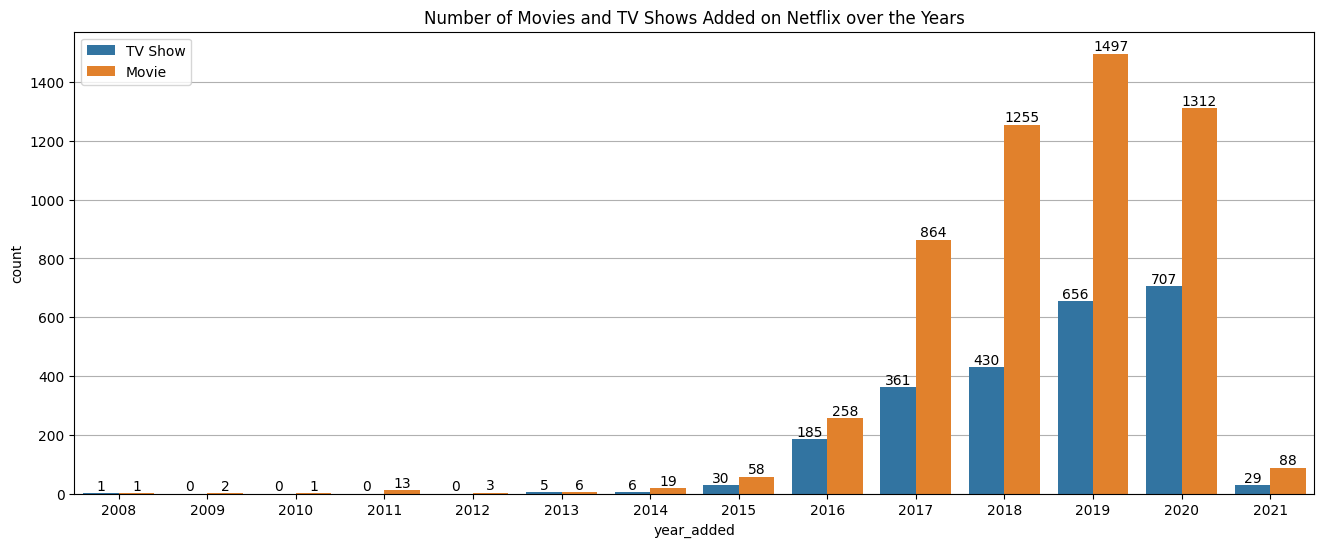

In [38]:
plt.figure(figsize = (16, 6))

sns.countplot(data = df, x = 'year_added', hue = 'type')

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)
ax.legend(loc = 'upper left')

for container in ax.containers:
  ax.bar_label(container)

plt.title('Number of Movies and TV Shows Added on Netflix over the Years')

* Note: Here, the number of new Movies and TV Shows being added to the Netflix database in a specific year is being discussed here, not the total number of Movies and TV Shows available on Netflix for streaming.

##### 1. Why did you pick the specific chart?

* To check the number of new Movies and TV Shows added on Netflix over the years.

##### 2. What is/are the insight(s) found from the chart?

* After the year of 2015, there has been rapid increase in the influx of both: Movies and TV Shows.
* There is a sharp rise in the number of new Movies being added, from 2015 to 2019. For the number of new TV Shows being added each year, there is a steady increase.
* In the year of 2020, the number of new Movies added was less than the previous year.

(The 2021 is ignored here, as this dataset is assumed to be compiled before 2021 was over).

#### Chart - 7: Bar Plot - Top 10 Most Content Producing Countries

Text(0.5, 1.0, 'Top 10 Most Content Producing Countries')

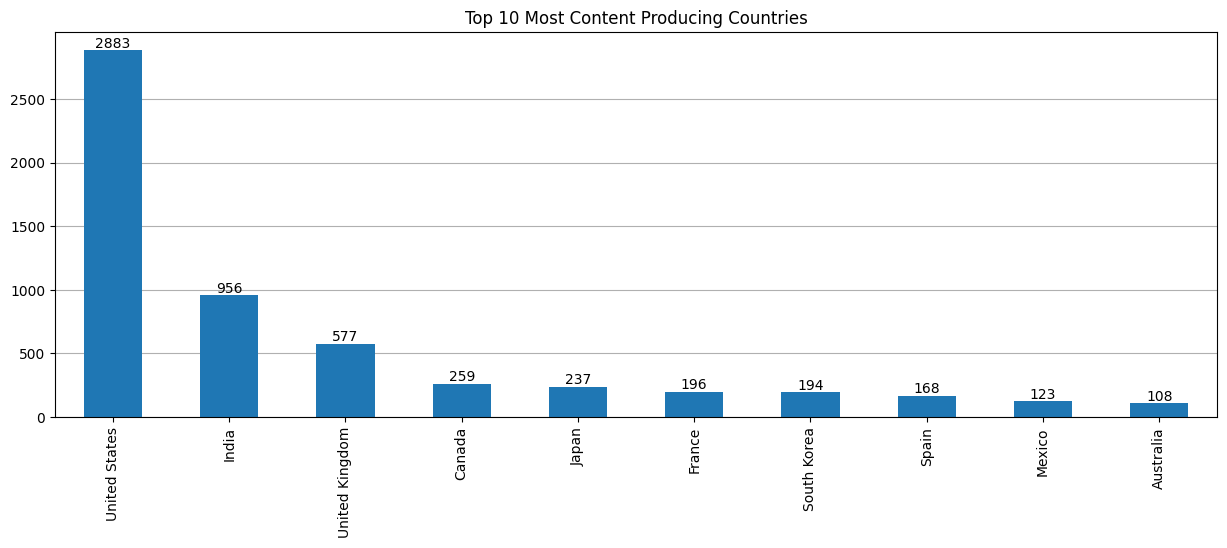

In [39]:
plt.figure(figsize = (15, 5))
plt.yticks(range(0, 3000, 500))

df[df['main_country'] != 'Unknown']['main_country'].value_counts().nlargest(10).plot(kind = 'bar')

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)


for container in ax.containers:
  ax.bar_label(container)

plt.title('Top 10 Most Content Producing Countries')

##### 1. Why did you pick the specific chart?

* To know which of the countries produce most of the contents for Netflix.

##### 2. What is/are the insight(s) found from the chart?

* Most of the contents for Netflix is produced by United States, followed by India, United Kingdom, Canada, Japan, France, South Korea and Spain.

#### Chart - 8: Bar Plot - Most Popular Genres by Country

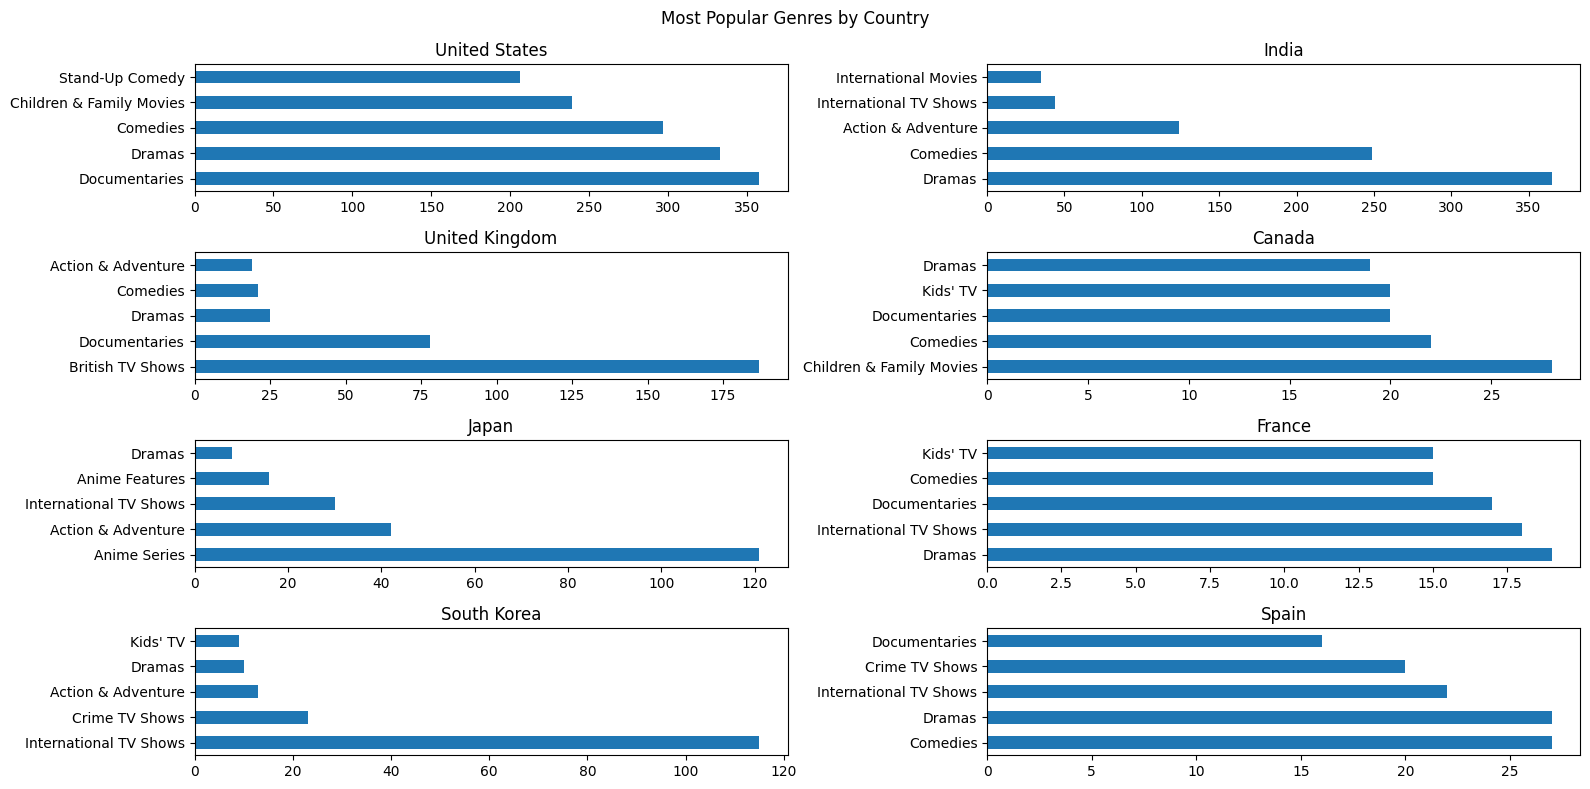

In [40]:
# We are considering only the top 8 content producing countries only
countries = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

plt.figure(figsize = (16, 8))

for country in countries:
  plt.subplot(len(countries)//2, 2, countries.index(country) + 1)
  df[df['country'] == country]['main_genre'].value_counts().nlargest(5).plot(kind = 'barh')
  plt.title(country)

plt.suptitle('Most Popular Genres by Country')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

* To know the most popular genres of the top content producing countries.

##### 2. What is/are the insight(s) found from the chart?

* Among the top content producing countries:
  - Documentaries are popular in United States;
  - Dramas are popular in India;
  - British TV Shows are popular in United Kingdom;
  - Children & Family Movies are popular in popular in Canada;
  - Anime Series are popular in Japan;
  - Dramas are popular in France;
  - International TV Shows are popular in South Korea;
  - Comedies are popular in Spain.

#### Chart - 9: Bar Plot - Most Popular Lead Actors

Text(0.5, 1.0, 'Most Popular Lead Actors')

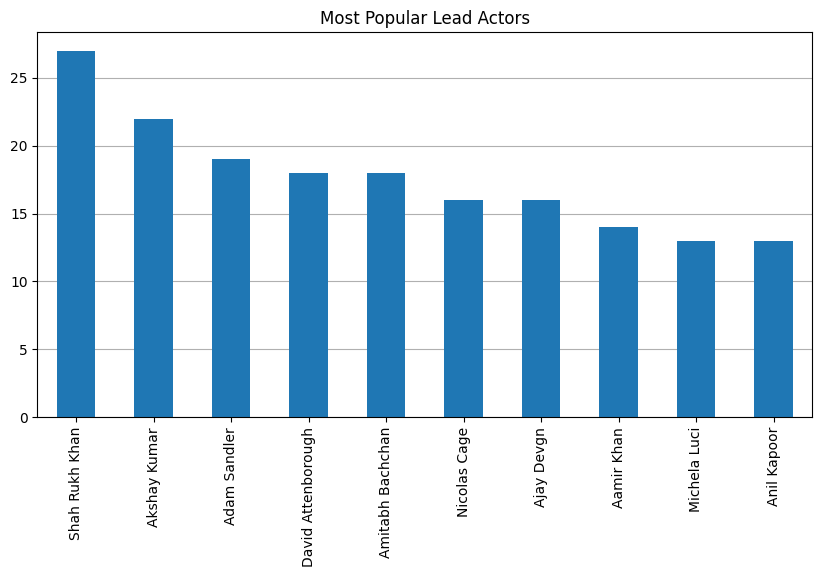

In [41]:
plt.figure(figsize = (10, 5))
df[df['lead_actor'] != 'Unknown']['lead_actor'].value_counts().nlargest(10).plot(kind = 'bar')

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)

plt.title('Most Popular Lead Actors')

##### 1. Why did you pick the specific chart?

* To know about the actors who have featured in the most number of lead roles.

##### 2. What is/are the insight(s) found from the chart?

* Shah Rukh Khan has played the most number of lead roles, followed by Akshay Kumar and Adam Sandler.

#### Chart - 10: Bar Plot - Most  Popular Directors

Text(0.5, 1.0, 'Most Popular Directors')

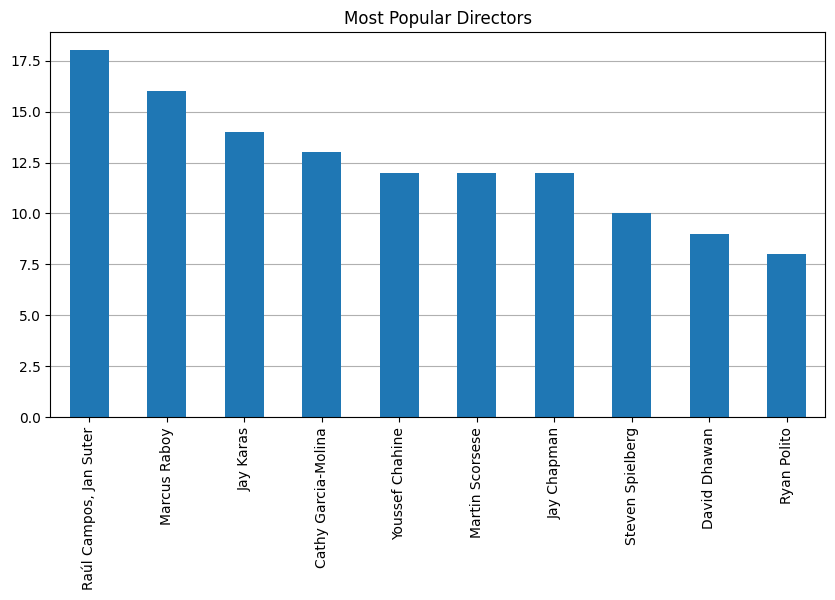

In [42]:
plt.figure(figsize = (10, 5))
df[df['director'] != 'Unknown']['director'].value_counts().nlargest(10).plot(kind = 'bar')

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)

plt.title('Most Popular Directors')

##### 1. Why did you pick the specific chart?

* To know about the directors who directed the most number of contents (including both Movies and TV Shows).

##### 2. What is/are the insight(s) found from the chart?

* The duo Raul Campos & Jan Suter are the most credited directors.

#### Chart - 11: Count Plot - Ratings of the Movies

Text(0.5, 1.0, 'Rating of the Movies')

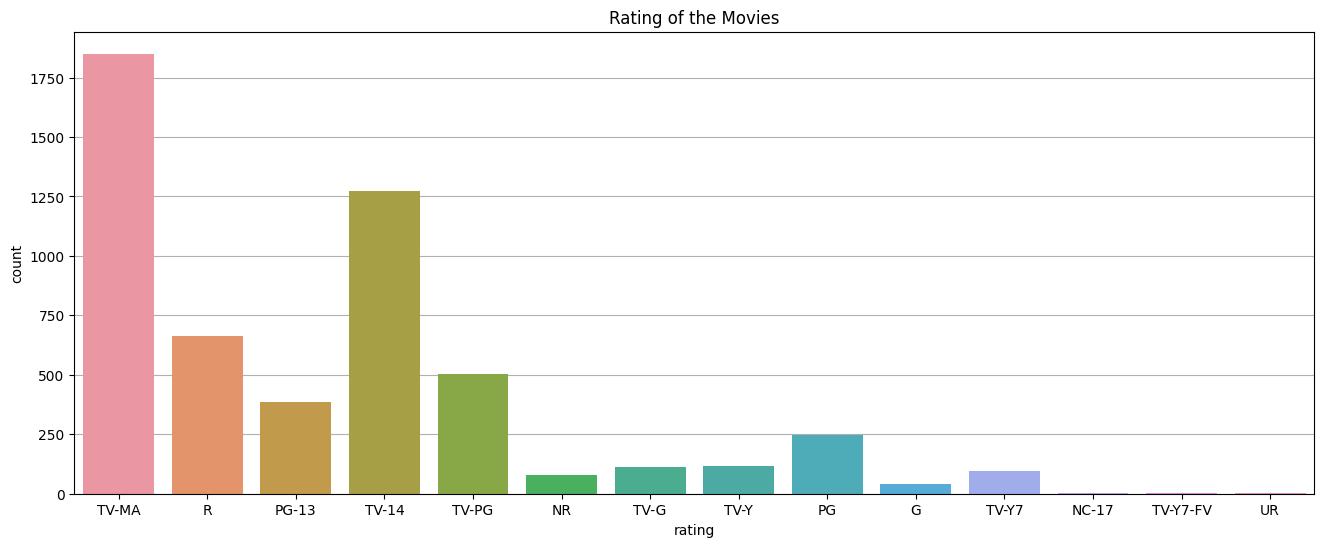

In [43]:
plt.figure(figsize = (16, 6))

sns.countplot(data = df[df['type'] == 'Movie'], x = 'rating')

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)

plt.title('Rating of the Movies')

##### 1. Why did you pick the specific chart?

* To know the most common Movie rating.

##### 2. What is/are the insight(s) found from the chart?

* 'TV-MA' is the most common rating for the Movies.

#### Chart - 12: Count Plot - Rating of the TV Shows

Text(0.5, 1.0, 'Rating of the TV Shows')

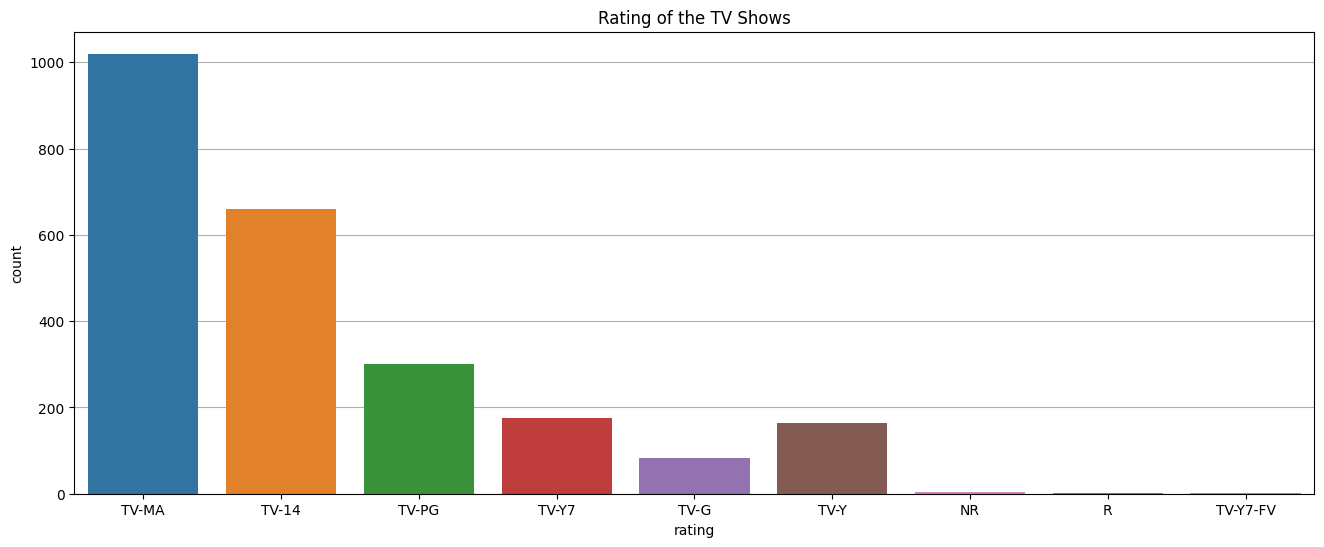

In [44]:
plt.figure(figsize = (16, 6))

sns.countplot(data = df[df['type'] == 'TV Show'], x = 'rating')

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)

plt.title('Rating of the TV Shows')

##### 1. Why did you pick the specific chart?

* To know the most common TV Show rating.

##### 2. What is/are the insight(s) found from the chart?

* 'TV-MA' is the most common rating for the TV Shows.

#### Chart - 13: Bar Plot - Duration of the Movies

Text(0.5, 1.0, 'Duration of the Movies')

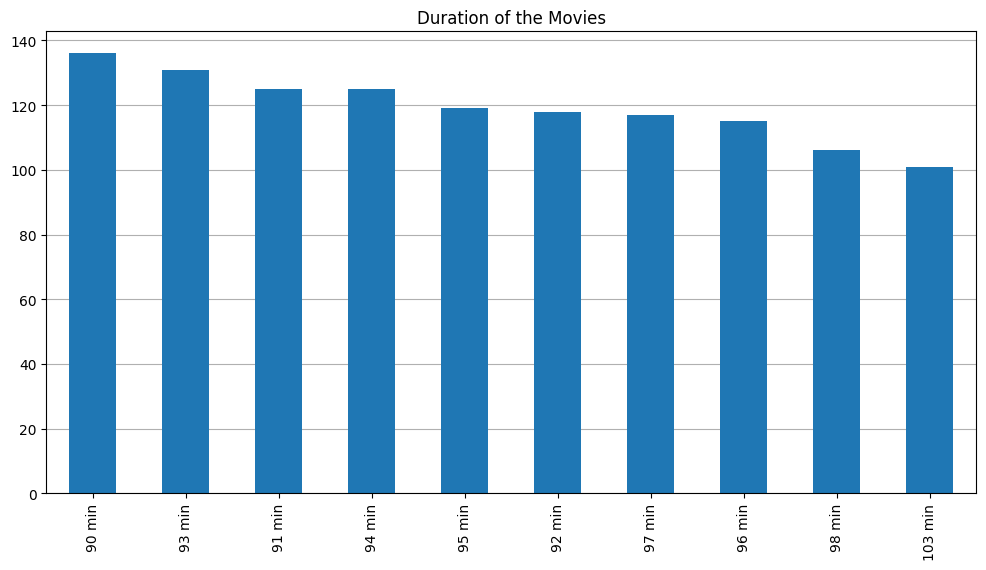

In [45]:
plt.figure(figsize = (12, 6))

df[df['type'] == 'Movie']['duration'].value_counts().nlargest(10).plot(kind = 'bar')

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)

plt.title('Duration of the Movies')

##### 1. Why did you pick the specific chart?

* To get an idea about the duration of the Movies.

##### 2. What is/are the insight(s) found from the chart?

* Most of the Movies are of 90 minutes.

#### Chart - 14: Bar Plot - Duration of the TV Shows

Text(0.5, 1.0, 'Duration of the TV Shows')

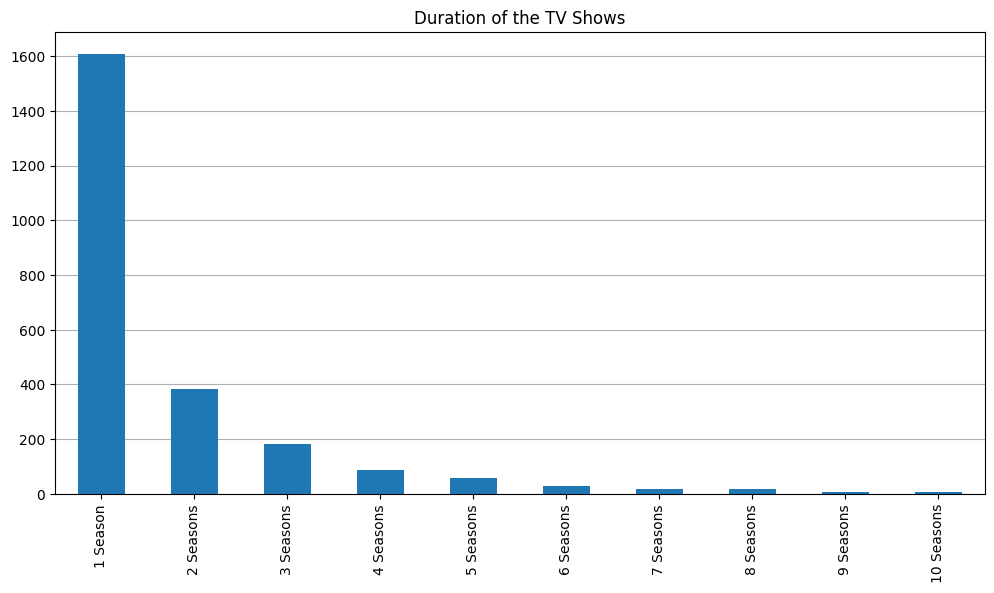

In [46]:
plt.figure(figsize = (12, 6))

df[df['type'] == 'TV Show']['duration'].value_counts().nlargest(10).plot(kind = 'bar')

ax = plt.gca()
ax.yaxis.grid()
ax.set_axisbelow(True)

plt.title('Duration of the TV Shows')

##### 1. Why did you pick the specific chart?

* To get an idea about the duration of the TV Shows.

##### 2. What is/are the insight(s) found from the chart?

* Most of the TV Shows have 1 season.

#### Chart - 15: Bar Plot - Release Years

<Axes: >

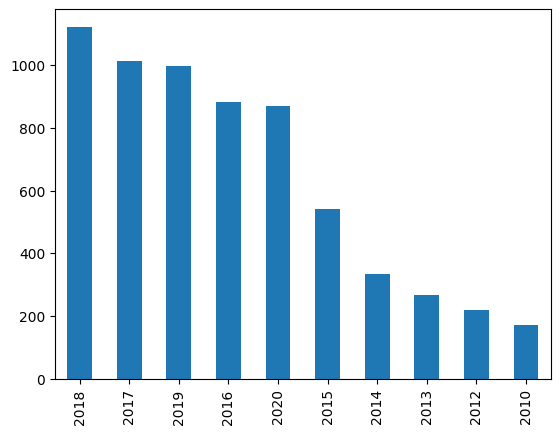

In [47]:
df['release_year'].value_counts().nlargest(10).plot(kind = 'bar')

##### 1. Why did you pick the specific chart?

* To have an idea regarding the release years of the contents (including both Movies and TV Shows) streamed on Netflix.

##### 2. What is/are the insight(s) found from the chart?

* Most of the contents are from the year 2018.

#### Chart - 16: Word Cloud: Most Frequent Words in the Descriptions

In [48]:
from wordcloud import WordCloud, STOPWORDS

In [49]:
def make_wordcloud(feature):
  '''
  This function takes in a feature of the dataset as an input and generates a Word Cloud for that feature.
  '''
  all_title_words = ''

  for value in df[feature].values:
    word_list = value.split()
    all_title_words += ' '.join(word_list) + ' '

  stopwords = set(STOPWORDS)

  plt.figure(figsize = (6, 6))
  wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white', stopwords = stopwords).generate(all_title_words)
  plt.axis('off')
  plt.imshow(wordcloud)

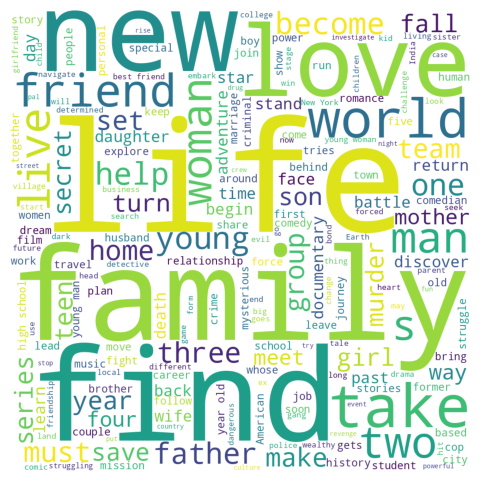

In [50]:
make_wordcloud('description')

##### 1. Why did you pick the specific chart?

* To know which words are frequently featured in the descriptions of all of the Movies and TV Shows ever featured on Netflix.

##### 2. What is/are the insight(s) found from the chart?

* Words like 'family', 'life', 'find', 'new', etc are frequently featured in the descriptions.

#### Chart - 17: Word Cloud - Most Frequent Words in the Titles

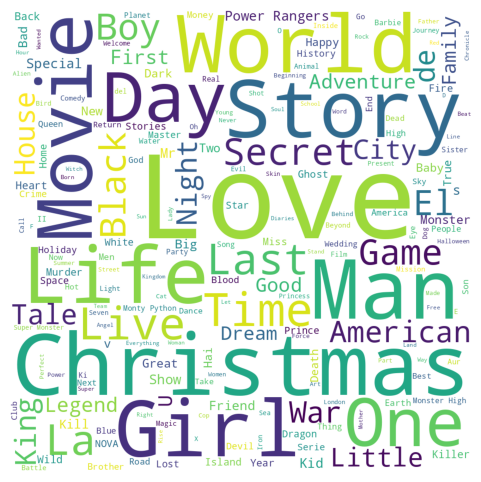

In [51]:
make_wordcloud('title')

##### 1. Why did you pick the specific chart?

* To know which words are frequently featured in the titles of all of the Movies and TV Shows ever featured on Netflix.

##### 2. What is/are the insight(s) found from the chart?

* Words like 'Love', 'Christmas', 'Girl', 'Man', 'World', 'Story', etc are frequently featured in the titles.

In [52]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,lead_actor,main_genre,main_country
0,s1,TV Show,3%,Unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,Aug,2020,João Miguel,International TV Shows,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,2016-12-23,2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Dec,2016,Demián Bichir,Dramas,Mexico
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,2018-12-20,2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",Dec,2018,Tedd Chan,Horror Movies,Singapore
3,s4,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,2017-11-16,2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi...",Nov,2017,Elijah Wood,Action & Adventure,United States
4,s5,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,2020-01-01,2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,Jan,2020,Jim Sturgess,Dramas,United States


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Here, `Chi-Square Test` is used to check whether there is relation between the 'type' of the content and the 'rating' of the content.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis, H<sub>0</sub> : There is no relationship between the 'type' of the content and the 'rating' of the content.
* Alternate Hypothesis, H<sub>A</sub> : There is a relationship between the 'type' of the content and the 'rating' of the content.

#### 2. Perform an appropriate statistical test.

In [53]:
# Importing the libraries
from scipy.stats import chi2_contingency

# Creating a contigency table for the variables
table = pd.crosstab(df['type'], df['rating'])

# Implementing the Chi-Square test

# The p-value:
p = chi2_contingency(table)[1]

if p < 0.05:
    print("There is a relationship between the 'type' of the content and the 'rating' of the content. (Null Hypothesis Rejected).")  # Null hypothesis rejected. Alternate Hypothesis accepted.
else:
    print(" There is no relationship between the 'type' of the content and the 'rating' of the content.") # Null hypothesis not rejected.

print(f'\n(The p-value is: {p})')

There is a relationship between the 'type' of the content and the 'rating' of the content. (Null Hypothesis Rejected).

(The p-value is: 7.897019106117343e-191)


In [54]:
table

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,
Movie,39,3,79,247,386,663,1272,111,1850,505,117,95,5,5
TV Show,0,0,5,0,0,2,659,83,1020,301,163,176,1,0


##### Why did you choose the specific statistical test?

* Chi-Square Test is a statistical test used to check whether there is a significant relationship between two categorical variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Here, `Chi-Square Test` is used to check whether there is relation between the 'type' of the content and the 'main_genre' of the content.

* Null Hypothesis, H<sub>0</sub> : There is no relationship between the 'type' of the content and the 'main_genre' of the content.
* Alternate Hypothesis, H<sub>A</sub> : There is a relationship between the 'type' of the content and the 'main_genre' of the content.

#### 2. Perform an appropriate statistical test.

In [55]:
# Creating a contigency table for the variables
table = pd.crosstab(df['type'], df['main_genre'])

# Implementing the Chi-Square test

# The p-value:
p = chi2_contingency(table)[1]

if p < 0.05:
    print("There is a relationship between the 'type' of the content and the 'main_genre' of the content. (Null Hypothesis Rejected).")  # Null hypothesis rejected. Alternate Hypothesis accepted.
else:
    print("There is no relationship between the 'type' of the content and the 'main_genre' of the content.") # Null hypothesis not rejected.

print(f'\n(The p-value is: {p})')

There is a relationship between the 'type' of the content and the 'main_genre' of the content. (Null Hypothesis Rejected).

(The p-value is: 0.0)


##### Why did you choose the specific statistical test?

* Chi-Square Test is a statistical test used to check whether there is a significant relationship between two categorical variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Here, `Chi-Square Test` is used to check whether there is relation between the 'main_genre' of the content and the 'rating' of the content.

* Null Hypothesis, H<sub>0</sub> : There is no relationship between the 'main_genre' of the content and the 'rating' of the content.
* Alternate Hypothesis, H<sub>A</sub> : There is a relationship between the 'main_genre' of the content and the 'rating' of the content.

#### 2. Perform an appropriate statistical test.

In [56]:
# Creating a contigency table for the variables
table = pd.crosstab(df['main_genre'], df['rating'])

# Implementing the Chi-Square test

# The p-value:
p = chi2_contingency(table)[1]

if p < 0.05:
    print("There is a relationship between the 'main_genre' of the content and the 'rating' of the content. (Null Hypothesis Rejected).")  # Null hypothesis rejected. Alternate Hypothesis accepted.
else:
    print("There is no relationship between the 'main_genre' of the content and the 'rating' of the content.") # Null hypothesis not rejected.

print(f'\n(The p-value is: {p})')

There is a relationship between the 'main_genre' of the content and the 'rating' of the content. (Null Hypothesis Rejected).

(The p-value is: 0.0)


##### Why did you choose the specific statistical test?

* Chi-Square Test is a statistical test used to check whether there is a significant relationship between two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [57]:
"The issue of missing values in the dataset was taken care of in the 'Data Wrangling' part."

"The issue of missing values in the dataset was taken care of in the 'Data Wrangling' part."

#### What all missing value imputation techniques have you used and why did you use those techniques?

* The missing values under the 'rating' and 'date_added' columns were imputed with the mode values of the respective columns.
* The missing values under the 'director', 'cast' and 'country' columns were imputed with a string named "Unknown".

### 2. Handling Outliers

In [58]:
"Not required."

'Not required.'

### 3. Categorical Encoding

In [59]:
"Not required."

'Not required.'

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [60]:
# Having a look at the original dataframe first
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,lead_actor,main_genre,main_country
0,s1,TV Show,3%,Unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,Aug,2020,João Miguel,International TV Shows,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,2016-12-23,2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Dec,2016,Demián Bichir,Dramas,Mexico


In [61]:
# Coverting the values under the 'cast' and 'listed_in' columns back to strings
df['cast'] = df['cast'].apply(lambda x: ''.join(x))
df['listed_in'] = df['listed_in'].apply(lambda x: ''.join(x))

In [62]:
# Replacing the 'Unknown' values in the dataframe with empty spaces ' '
df.replace('Unknown', ' ', inplace = True)

#### 2. Feature Selection

In [63]:
# Creating a new dataframe to store the title of the contentand the data foor clustering
cluster_df = pd.DataFrame(columns = ['title', 'cluster_data'])

In [64]:
# Adding all the required features from the original dataframe
cluster_df['title'] = df['title']

cluster_df['cluster_data'] = (df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['description'])

In [65]:
# Checking the cluster_df dataframe
cluster_df.head(2)

,title,cluster_data
0,3%,João Miguel Bianca Comparato Michel Gomes Ro...
1,7:19,Jorge Michel Grau Demián Bichir Héctor Bonilla...


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Lower Casing

In [66]:
# Converting the necessary text into all lowercase
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: x.lower())

#### 2. Removing Punctuations

In [67]:
# Importing the string library
import string

In [68]:
def remove_punct(text):
  '''
  This function removes the punctuations from the input textual data.
  '''
  translator = str.maketrans('', '', string.punctuation)      # 'string.punctuation' is a constant string which contains a collection of all the ASCII punctuation characters.

  return text.translate(translator)


In [69]:
# Removing the punctuations from selected feature
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punct)

#### 3. Removing Non-ASCII Characters

In [70]:
# Importing the unicodedata library
import unicodedata

In [71]:
def remove_non_ascii(input):
  '''
  This function removes non-ascii characters from the input textual data.
  '''
  output = []
  for text in input:
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')      # 'unicodedata.normalize('NKFD', text)' normalizes the unicode text into a standard form using NKFD (Normalization Form KD).
    output.append(new_text)                                                                                 # 'unicodedata..encode('ascii', 'ignore')' encodes resulting the text into ASCII format and ignores the characters which are not ASCII.
  return output                                                                                             # 'unicodedata..decode('utf-8', 'ignore')' decodes the text in ASCII format back into UTF-8 format and ignores the characters which are not UTF-8.


In [72]:
# Removing the the non-ASCII characters
cluster_df['cluster_data'] = remove_non_ascii(cluster_df['cluster_data'])

#### 4. Expand Contraction

In [73]:
# Installing and importing the 'contractions' library
! pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.1 MB/s eta 0:00:00


In [74]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: contractions.fix(x))

#### 5. Removing Stopwords & Removing White spaces

In [75]:
# Importing the nltk library
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [76]:
def remove_stopwords(input):
  '''
  This function removes stopwords from the input textual data.
  '''

  output = [text for text in input.split() if text not in stopwords.words('english')]

  return ' '.join(output)



In [77]:
# Removing stopwords
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_stopwords)

#### 6. Text Normalization

In [78]:
# Importing the WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [79]:
def lemmatize(input):
  '''
  This function lemmatizes the verbs in the input textual data.
  '''
  lemmatizer = WordNetLemmatizer()

  lemmas = []

  for text in input:
    lemma = lemmatizer.lemmatize(text, pos = 'v')
    lemmas.append(lemma)

  return lemmas

In [80]:
# Lemmatizing
cluster_df['cluster_data'] = lemmatize(cluster_df['cluster_data'])

##### Which text normalization technique have you used and why?

* Lemmatization is the process of reducing words to their base or dictionary form called 'lemmas'.
* To be more precise, WordNetLemmatizer is implemetented here, it uses the information stored in WordNet's database to map the words to their base form.

#### 7. Tokenization

In [81]:
# Importing word_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [82]:
# Tokenizing
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: word_tokenize(x))

* Tokenization is the process of breaking down a text into smaller units (in this case, words) called tokens.

#### 8. Text Vectorization

In [83]:
# Importing TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
def dummy_tokenizer(input):
  '''
  This function simply returns the input.
  Note: We are using this function as a parameter for the tokenizer in the tfidfvectorizer because we have already tokenized the input.
  '''
  return input

In [85]:
# Vectorizing
tfidfvectorizer = TfidfVectorizer(tokenizer = dummy_tokenizer, max_features = 10000, lowercase = False)

X = tfidfvectorizer.fit_transform(cluster_df['cluster_data'])

In [86]:
# Converting into a sparse array
X = X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
# The shape of X
X.shape

(7787, 10000)

##### Which text vectorization technique have you used and why?

* Term Frequency - Inverse Document Frequency (TF-IDF) is a numerical representation to evaluate or weigh the importance of a term within a collection of documents or a corpus.

### 9. Dimesionality Reduction

In [88]:
# Importing PCA
from sklearn.decomposition import PCA

In [89]:
# Implementing PCA
'''
pca = PCA(random_state = 0)
pca.fit(X)
'''

'\npca = PCA(random_state = 0)\npca.fit(X)\n'

In [90]:
# Checking the explained variance ratio, i.e. the variance explained by each of the principal components
'''
pca.explained_variance_ratio_
'''

'\npca.explained_variance_ratio_\n'

In [91]:
'''
plt.figure(figsize = (10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))    # Calculates the cumulative sum of the explained variance ratio
plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumumlative Variance Explained Ratio')
plt.title('Cumulative Variance Explained Ratio for Different Number of Principal Components')
'''

"\nplt.figure(figsize = (10, 5))\nplt.plot(np.cumsum(pca.explained_variance_ratio_))    # Calculates the cumulative sum of the explained variance ratio\nplt.grid()\nplt.xlabel('Number of Principal Components')\nplt.ylabel('Cumumlative Variance Explained Ratio')\nplt.title('Cumulative Variance Explained Ratio for Different Number of Principal Components')\n"

* It can be observed that about a 90% of the variance can be explained by 4000 principal components.
* So, the Principal Component Analysis can be used to reduce the dimensionality upto 4000 components.

In [92]:
# Using PCA, reducing the dimensions to 4000
pca = PCA(n_components = 4000, random_state = 0)
X_PCA = pca.fit_transform(X)

In [217]:
# The shape of X after dimensionality reduction
X_PCA.shape

(7787, 4000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

* Principal Component Analysis (PCA) is a technique that is commonly used for dimensionality reduction. PCA finds a lower-dimensional representation of the data that captures the maximum variation in the data.

## ***7. ML Model Implementation***

### ML Model - 1: K-Means Clustering

In [106]:
# ML Model - 1 Importing the necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#### Elbow Plot

In [94]:
def elbow_plot(k, X):
  '''
  This function plots an elbow plot for a given value of 'K' and a dataset 'X'
  '''

  inertia_list = []
  for i in range(2, k + 1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

    # Inertia is basically the the sum of squared distances between the samples and the centroid of the cluster. Meassures how well the clustering was done.

  cluster_number = range(len(inertia_list))

  plt.figure(figsize = (10, 5))
  plt.plot(cluster_number, inertia_list, marker = 'o')
  plt.grid()
  plt.xticks(range(2, k + 1))
  plt.xlim([2, k])
  plt.xlabel('Number of Clusters (K)')
  plt.ylabel('Inertia')
  plt.title('Elbow Plot - K-Means Clustering')


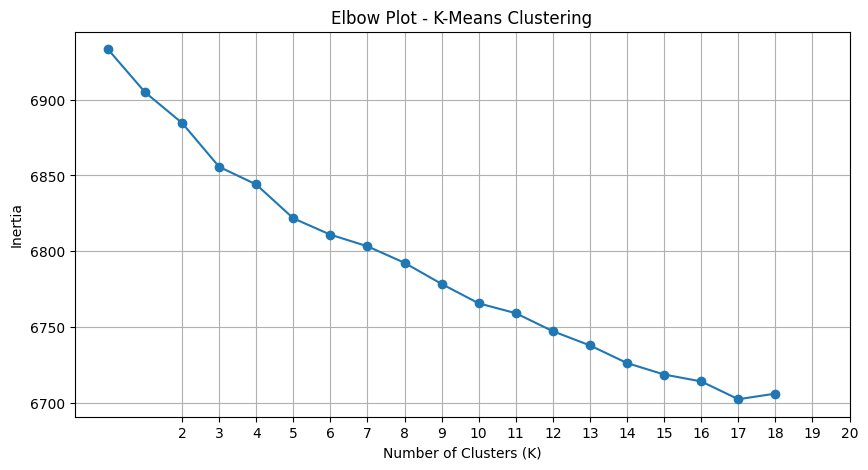

In [95]:
# Plotting the elbow plot for k = 20 and X_PCA
elbow_plot(20, X_PCA)

* So, as the number of clusters increases, the inertia (sum of the squared distance between point and distance) decreases.

####  Silhoutte Analysis

In [105]:
def silhoutte_analysis_kmeans(k, X):
  '''
  This function generates the silhouette scores for different clusters and visualises them.
  '''
  k_maxscore = [0, 0]

  for i in range(2, k + 1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km_cluster_labels = kmeans.fit_predict(X)

    km_score = silhouette_score(X, km_cluster_labels, metric = 'euclidean')

    if k_maxscore[1] < score:
      k_maxscore[0] = i
      k_maxscore[1] = score

    plt.figure(figsize = (5, 5))
    visualizer = SilhouetteVisualizer(kmeans)

    print(f"\nWhen there are \033[1m{i}\033[0m clusters, the silhouette score is \033[1m{score}\033[0m.")
    visualizer.fit(X)
    visualizer.show()

  print(f"\nResult: In case of the K-Means Clustering, the maximum silhouette score is \033[1m{k_maxscore[1]}\033[0m for \033[1m{k_maxscore[0]}\033[0m clusters.")

  return km_score



When there are 2 clusters, the silhouette score is 0.006359052511333426.


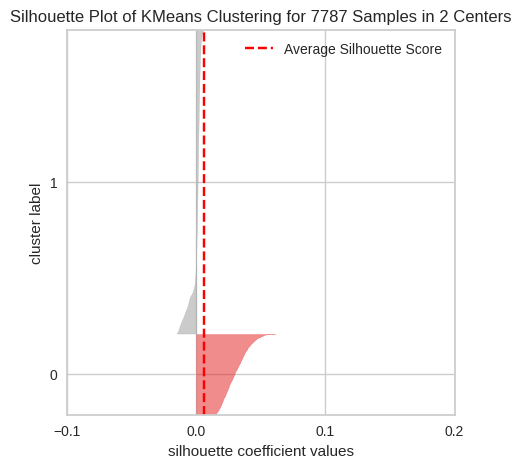


When there are 3 clusters, the silhouette score is 0.007759990042007808.


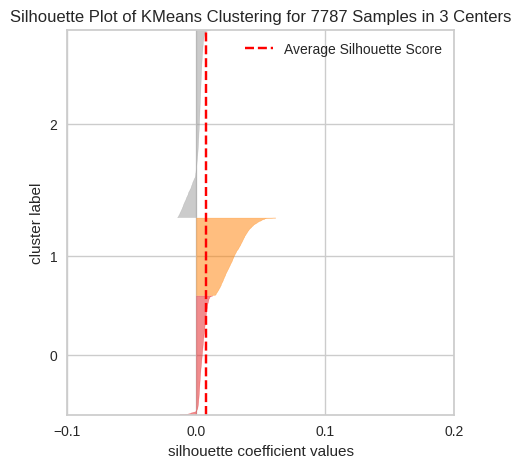


When there are 4 clusters, the silhouette score is 0.008545110089043363.


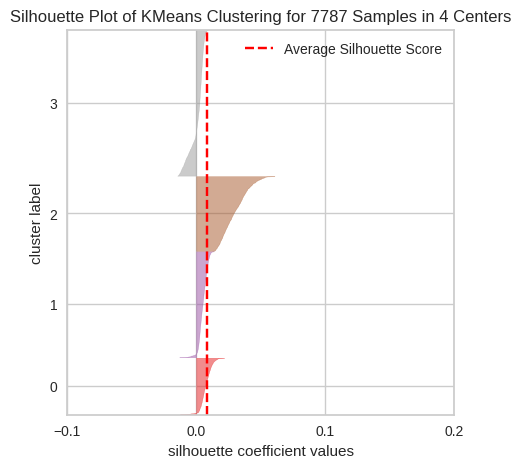


When there are 5 clusters, the silhouette score is 0.004810436369748539.


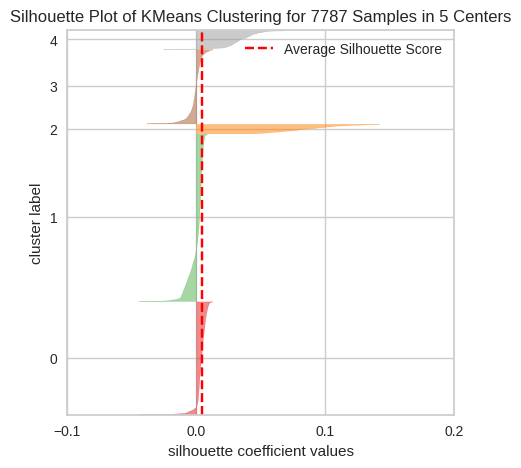


When there are 6 clusters, the silhouette score is 0.008329837784059324.


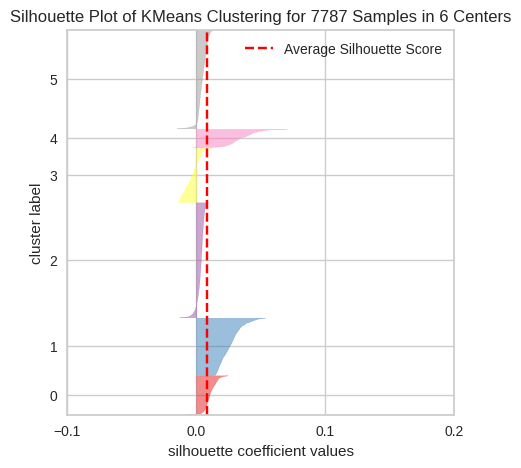


When there are 7 clusters, the silhouette score is 0.006437772289897791.


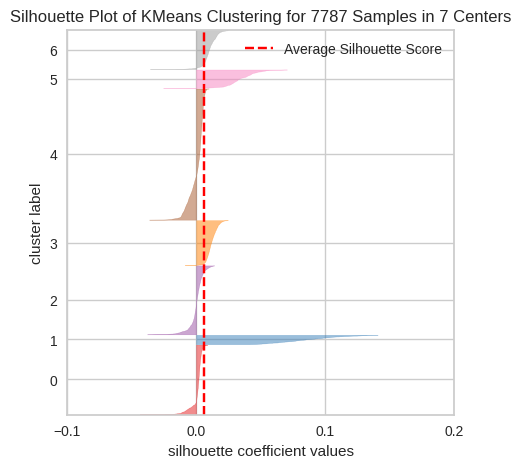


When there are 8 clusters, the silhouette score is 0.006768212011700419.


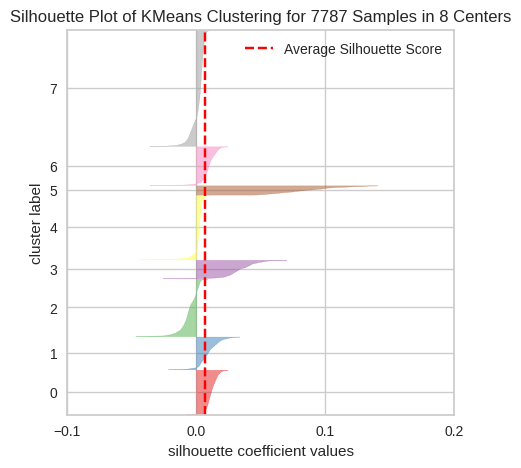


When there are 9 clusters, the silhouette score is 0.008974618975692572.


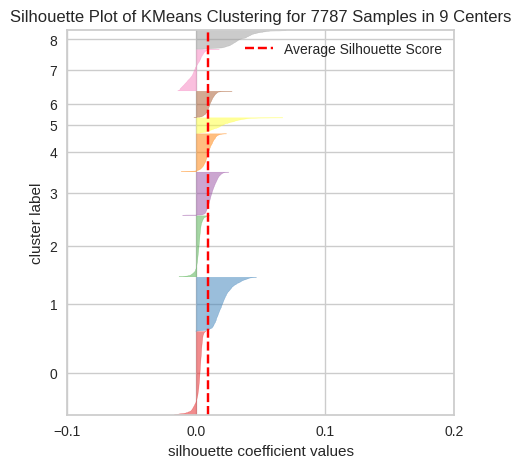


When there are 10 clusters, the silhouette score is 0.006769339430393403.


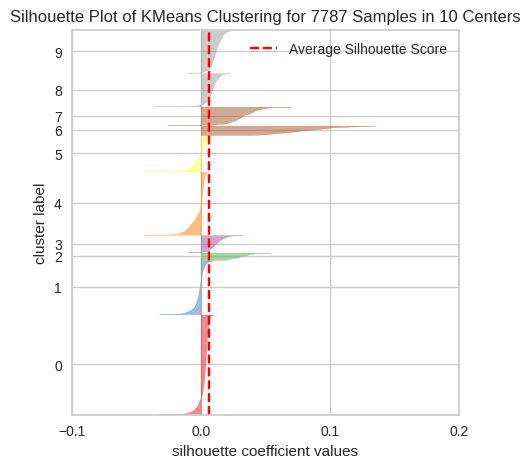


When there are 11 clusters, the silhouette score is 0.007824172464668173.


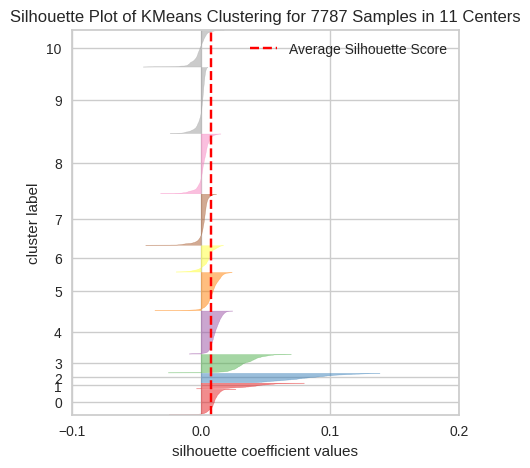


When there are 12 clusters, the silhouette score is 0.007844045430564972.


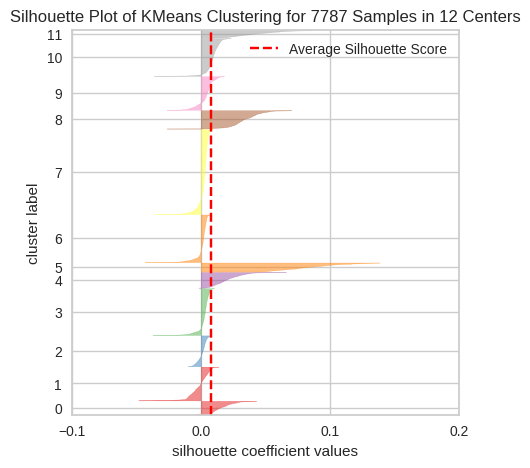


The maximum silhouette score is 9 and 0.008974618975692572 clusters.


In [102]:
# Silhouette Analysis for k = 20 and X_PCA
silhoutte_analysis_kmeans(12, X_PCA)

In [ ]:
kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 0)

* As k = 9 gives the highest silhouette score, it the optimum value for k.
* Hence, 9 clusters can be built using the K-Mean Clustering.


### ML Model - 2 - Agglomerative (Hierarchical) Clustering

In [110]:
# ML Model - 2 Importing the necessary libraries
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

####  Dendrogram

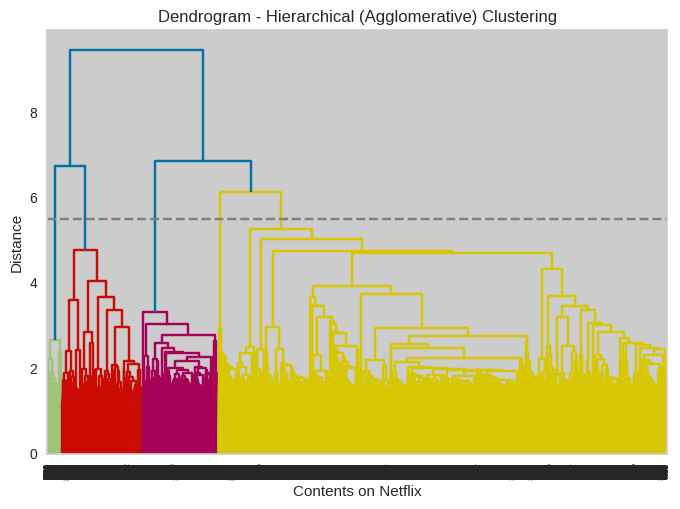

In [113]:
# Plotting the dendogram and determining the threshold
plt.figure(figsize = (10, 10))
dend = sch.dendrogram(sch.linkage(X_PCA, method = 'ward'))
plt.xlabel('Contents on Netflix')
plt.ylabel('Distance')
plt.title('Dendrogram - Hierarchical (Agglomerative) Clustering')

plt.axhline(y = 5.6, color = 'grey', linestyle = '--')

* From the dendrogram, it can be observed based upon the threshold distance that 5 clusters is the optimum number of clusters that can be formed (the threshold is decided at a level such that it will cut through the longest vertical line).

In [145]:
# Fitting and Predicting on the Algorithm
ahc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
ahc_cluster_labels = ahc.fit_predict(X_PCA)

####  Silhoutte Analysis

In [146]:
# Computing the Silhouette Score for the Agglomerative Clustering Model
ahc_score = silhouette_score(X_PCA, ahc_cluster_labels, metric = 'euclidean')
print(f"\nIn case of the Agglomerative Clustering, the Silhouette Score is \033[1m{ahc_score}\033[0m.")


In case of the Agglomerative Clustering, the Silhouette Score is 0.0014473461326909678.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***